# Exercise 3.5
![img](imgs/Screenshot_2018-04-20_12-38-01.png)

We reuse what we already had in ex3.3

In [1]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)
#initial parameters
gamma = .9
R = np.matrix([[-1],[.6],[.5],[-.9]])
P = np.matrix([[0.8,0.2],[0.2,0.8],[0.3,0.7],[0.9,0.1]])
pi1 = [[1,0,0,0],[0,0,1,0]]
pi2 = [[0,1,0,0],[0,0,1,0]]
pi3 = [[1,0,0,0],[0,0,0,1]]
pi4 = [[0,1,0,0],[0,0,0,1]]

We evaluate the value functions for the 4 different policies.

In [2]:
from numpy.linalg import inv

#function to evaluate the state value(V) function of a certain policy
def eval_v(policy):
    P_pi = np.matmul(policy,P)
    R_pi = np.matmul(policy,R)
    
    return np.matmul(inv(np.identity(P_pi.shape[0]) - gamma * P_pi) , R_pi)

v1 = eval_v(pi1)
v2 = eval_v(pi2)
v3 = eval_v(pi3)
v4 = eval_v(pi4)

Now we generate 1000 random policies and evaluate their value functions. To compare one against another we will sum the values for the 2 states(\*) and plot them in a histogram. We will see that they are 
located between policy 2 which is the best and policy 3 which is the worst.

(\*) *Not sure if this is the best way to compare them* TO-DO do a scatter plot, as in the document.

In [3]:
import matplotlib
from random import uniform
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13.0, 9.0)

values = []
# We iterate 1000 times to generate the policies
for i in range(1000):
    #we generate 2 probabilities of taking each action from each state
    p = uniform(0, 1)
    q = uniform(0, 1)
    # We generate the policy from those 2 probabilities, making sure no invalid actions are taken
    pi_random = [[p,1 - p,0,0],[0,0,q,1 - q]]
    # We evaluate and sum the values for the 2 states.
    values.append(np.sum(eval_v(pi_random)))

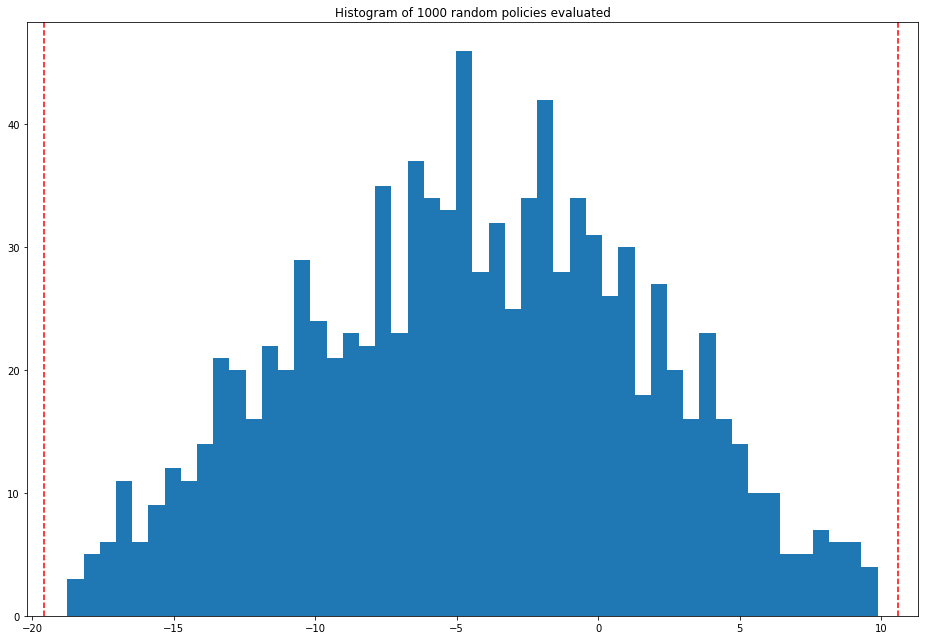

In [4]:
fig, ax = plt.subplots()

num_bins = 50
# the histogram of the data
ax.hist(values, num_bins)
ax.set_title(r'Histogram of 1000 random policies evaluated')
ax.axvline(np.sum(v2), ls='--', color='r')
ax.axvline(np.sum(v3), ls='--', color='r')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()